# Proyek Analisis Data: E-Commerce Public Dataset

- **Nama**: A Fuad Ahsan Basir
- **Email**: andifuad104@gmail.com
- **ID Dicoding**: fuad_ahsan

## Menentukan Pertanyaan Bisnis

- Berapa jumlah dan total transaksi yang dilakukan pada platfrom e-commerce setiap bulannya?
- Kategori produk apa yang memiliki penjualan tertinggi dan terendah?
- Bagaimana kinerja pengantaran barang?
- Kota mana yang memiliki jumlah pelanggan terbanyak dan daya beli terbesar?

## Import Library

In [1]:
# Mengimpor Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data

In [2]:
# Mengumpulkan data Customer
customers_df = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [3]:
# Mengumpulkan data geolocation
geolocation_df = pd.read_csv("E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [4]:
# Mengumpulkan data item pembelian
order_items_df = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [5]:
# Mengumpulkan data pembayaran pembelian
order_payments_df = pd.read_csv("E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [6]:
# Mengumpulkan data review pembelian
order_reviews_df = pd.read_csv("E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [7]:
# Mengumpulkan data pembelian
orders_df = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [8]:
# Mengumpulkan data terjemahan kategori produk
product_category_translation_df = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_translation_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [9]:
# Mengumpulkan data produk
products_df = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [10]:
# Mengumpulkan data penjual
sellers_df = pd.read_csv("E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

### Assessing Data

#### Menilai Tabel `customers_df`

In [11]:
# Mendapatkan informasi singkat dari dataframe
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Berdasarkan data di atas, diketahui bahwa Tabel `customers_df` tidak memiliki missing value

In [12]:
# Mendapatkan jumlah data yang duplikat dari dataframe
print(f"Jumlah Duplikasi: {customers_df.duplicated().sum()}")

Jumlah Duplikasi: 0


Tabel `customers_df` tidak memiliki data yang duplikat

In [13]:
# Mendapatkan descriptive statistics dataframe
customers_df.describe(include='all')

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

#### Menilai Tabel `geolocation_df`

In [14]:
# Mendapatkan informasi singkat dari dataframe
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Tabel `geolocation_df` tidak memiliki missing value

In [15]:
# Mendapatkan jumlah data yang duplikat dari dataframe
print(f"Jumlah Duplikasi: {geolocation_df.duplicated().sum()}")

Jumlah Duplikasi: 261831


Tabel `geolocation_df` memiliki data yang duplikat sebanyak 261831 data

In [16]:
# Mendapatkan descriptive statistics dataframe
geolocation_df.describe(include='all')

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
unique             8011                27  
top           sao paulo                SP  
freq             135800            404268  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

#### Menilai Tabel `order_items_df`

In [17]:
# Mendapatkan informasi singkat dari dataframe
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Kolom **shipping_limit_date** memiliki tipe data yang tidak sesuai (kolom tersebut seharusnya memiliki tipe data datetime)

Tabel `order_items_df` tidak memiliki missing value.

In [18]:
# Mendapatkan jumlah data yang duplikat dari dataframe
print(f"Jumlah Duplikasi: {order_items_df.duplicated().sum()}")

Jumlah Duplikasi: 0


Tabel `order_items_df` tidak memiliki data yang duplikat

In [19]:
# Mendapatkan descriptive statistics dataframe
order_items_df.describe(include='all')

order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        shipping_limit_date          price  freight_value  
count                112650  112650.000000  112650.000000  
unique                93318            NaN            NaN  
top     2017-07-21 18:25:23            NaN            NaN  
freq                     21            NaN            NaN  
mean                    NaN     120.653739      19.990320  
std                     NaN     183.633928      15.806405  
min                     NaN       0.850000       0.000000  
25%                     NaN      39.900000      13.080000  
50%                     NaN      74.990000      16.260000  
75%                     NaN     134.900000      21.150000  
max                     NaN    6735.000000     409.680000

#### Menilai Tabel `order_payments_df`

In [20]:
# Mendapatkan informasi singkat dari dataframe
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tabel `order_payments_df` tidak memiliki missing value

In [21]:
# Mendapatkan jumlah data yang duplikat dari dataframe
print(f"Jumlah Duplikasi: {order_payments_df.duplicated().sum()}")

Jumlah Duplikasi: 0


Tabel `order_payments_df` tidak memiliki data yang duplikat

In [22]:
# Mendapatkan descriptive statistics dataframe
order_payments_df.describe(include='all')

order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000  103886.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853349     154.100380  
std                 2.687051     217.494064  
min                 0.000000       0.000000  
25%                 1.000000      56.790000  
50%                 1.000000     100.000000  
75%                 4.000000     171.837500  
max                24.000000   13664.080000

#### Menilai Table `order_reviews_df`

In [23]:
# Mendapatkan informasi singkat dari dataframe
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Kolom **review_creation_date** dan **review_answer_timestamp** memiliki tipe data yang tidak sesuai (kolom tersebut seharusnya memiliki tipe data datetime)

In [24]:
# Mendapatkan jumlah missing value dari dataframe
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Tabel `order_reviews_df` memiliki sejumlah missing value pada kolom **review_comment_title** dan **review_comment_message**

In [25]:
# Mendapatkan jumlah data yang duplikat dari dataframe
print(f"Jumlah Duplikasi: {order_reviews_df.duplicated().sum()}")

Jumlah Duplikasi: 0


Tabel `order_reviews_df` tidak memiliki data yang duplikat

In [26]:
# Mendapatkan descriptive statistics dataframe
order_reviews_df.describe(include='all')

review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        review_score review_comment_title review_comment_message  \
count   99224.000000                11568                  40977   
unique           NaN                 4527                  36159   
top              NaN            Recomendo              Muito bom   
freq             NaN                  423                    230   
mean        4.086421                  NaN                    NaN   
std         1.347579                  NaN                    NaN   
min         1.000000                  NaN                    NaN   
25%         4.000000                  NaN                    NaN   
50%         5.000000                  NaN                    NaN   
75%         5.000000                  NaN                    NaN   
max         5.000000                  NaN                    NaN   

       review_creation_date review_answer_timestamp  
count                 99224                   99224  
unique                  636                   98248  
top     2017-12-19 00:00:00     2017-06-15 23:21:05  
freq                    463                       4  
mean                    NaN                     NaN  
std                     NaN                     NaN  
min                     NaN                     NaN  
25%                     NaN                     NaN  
50%                     NaN                     NaN  
75%                     NaN                     NaN  
max                     NaN                     NaN

#### Menilai Tabel `orders_df`

In [27]:
# Mendapatkan informasi singkat dari dataframe
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date** memiliki tipe data yang tidak sesuai (kolom tersebut seharusnya memiliki tipe data datetime)

In [28]:
# Mendapatkan jumlah missing value dari dataframe
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Tabel `orders_df` memiliki sejumlah missing value pada kolom **order_approved**, **order_delivered_carrier_date**, dan **order_delivered_customer_date**

In [29]:
# Mendapatkan jumlah data yang duplikat dari dataframe
print(f"Jumlah Duplikasi: {orders_df.duplicated().sum()}")

Jumlah Duplikasi: 0


Tabel `orders_df` tidak memiliki data yang duplikat

In [30]:
# Mendapatkan descriptive statistics dataframe
orders_df.describe(include='all')

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

#### Menilai Tabel `product_category_translation_df`

In [31]:
# Mendapatkan informasi singkat dari dataframe
product_category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tabel `product_category_translation_df` tidak memiliki missing value

In [32]:
# Mendapatkan jumlah data yang duplikat dari dataframe
print(f"Jumlah Duplikasi: {product_category_translation_df.duplicated().sum()}")

Jumlah Duplikasi: 0


Tabel `products_df` tidak memiliki data yang duplikat

In [33]:
# Mendapatkan descriptive statistics dataframe
product_category_translation_df.describe(include='all')

product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

#### Menilai Tabel `products_df`

In [34]:
# Mendapatkan informasi singkat dari dataframe
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [35]:
# Mendapatkan Total Missing Value pada setiap kolom
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Tabel `products_df` memiliki sejumlah missing value pada kolom **product_category_name**, **product_name_lenght**, **product_description_lenght**, dan **product_photos_qty**

In [36]:
# Mendapatkan jumlah data yang duplikat dari dataframe
print(f"Jumlah Duplikasi: {products_df.duplicated().sum()}")

Jumlah Duplikasi: 0


Tabel `products_df` tidak memiliki data yang duplikat

In [37]:
# Mendapatkan descriptive statistics dataframe
products_df.describe(include='all')

product_id product_category_name  \
count                              32951                 32341   
unique                             32951                    73   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32341.000000                32341.000000        32341.000000   
unique                  NaN                         NaN                 NaN   
top                     NaN                         NaN                 NaN   
freq                    NaN                         NaN                 NaN   
mean              48.476949                  771.495285            2.188986   
std               10.245741                  635.115225            1.736766   
min                5.000000                    4.000000            1.000000   
25%               42.000000                  339.000000            1.000000   
50%               51.000000                  595.000000            1.000000   
75%               57.000000                  972.000000            3.000000   
max               76.000000                 3992.000000           20.000000   

        product_weight_g  product_length_cm  product_height_cm  \
count       32949.000000       32949.000000       32949.000000   
unique               NaN                NaN                NaN   
top                  NaN                NaN                NaN   
freq                 NaN                NaN                NaN   
mean         2276.472488          30.815078          16.937661   
std          4282.038731          16.914458          13.637554   
min             0.000000           7.000000           2.000000   
25%           300.000000          18.000000           8.000000   
50%           700.000000          25.000000          13.000000   
75%          1900.000000          38.000000          21.000000   
max         40425.000000         105.000000         105.000000   

        product_width_cm  
count       32949.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean           23.196728  
std            12.079047  
min             6.000000  
25%            15.000000  
50%            20.000000  
75%            30.000000  
max           118.000000

#### Menilai Tabel `sellers_df`

In [38]:
# Mendapatkan informasi singkat dari dataframe
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Tabel `sellers_df` tidak memiliki missing value

In [39]:
# Mendapatkan jumlah data yang duplikat dari dataframe
print(f"Jumlah Duplikasi: {sellers_df.duplicated().sum()}")

Jumlah Duplikasi: 0


Tabel `sellers_df` tidak memiliki data yang duplikat

In [40]:
# Mendapatkan descriptive statistics dataframe
sellers_df.describe(include='all')

seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                                  NaN            32713.453830         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN             7093.500000         NaN   
50%                                  NaN            14940.000000         NaN   
75%                                  NaN            64552.500000         NaN   
max                                  NaN            99730.000000         NaN   

       seller_state  
count          3095  
unique           23  
top              SP  
freq           1849  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

## Cleaning Data

### Membersihkan Tabel `geolocation_df`

#### Duplicate Data

In [41]:
# Mendapatkan jumlah data yang duplikat
geolocation_df.duplicated().sum()

261831

In [42]:
# Modifikasi dataframe dengan menghapus data yang duplikat 
geolocation_df.drop_duplicates(inplace=True)

In [43]:
# Memastikan data yang terduplikat sudah dihapus
print(f"Jumlah Duplikasi: {geolocation_df.duplicated().sum()}")

Jumlah Duplikasi: 0


### Membersihkan Tabel `order_items_df`

#### Memperbaiki Tipe Data

In [44]:
# Mendapatkan informasi singkat dari dataframe
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [45]:
# Mendapatkan 5 data pertama pada dataframe
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [46]:
# Mengubah tipe data menjadi datetime
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [47]:
# Mengecek perubahan tipe data yang terjadi pada tabel order_items_df
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [48]:
# Mengecek apakah terjadi perubahan data setelah tipe data pada kolom diubah
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

### Membersihkan Tabel `order_reviews_df`

#### Missing Value

In [49]:
# Mendapatkan jumlah missing value pada dataframe
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Karena data yang hilang merupakan judul komentar review dan isi pesan komentar review, kita bisa mengisi bagian tersebut dengan 'None' yang menandakan bahwa pembeli tidak memberikan review atas barang yang dibelinya

In [50]:
# Mengganti data yang hilang dengan string "None"
order_reviews_df.fillna(value="None", inplace=True)

In [51]:
# Memastikan sudah tidak terdapat missing value
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Memperbaiki Tipe Data

In [52]:
# Mendapatkan informasi singkat dari dataframe
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [53]:
# Mendapatkan 5 data pertama dari dataframe
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                 None   
1             5                 None   
2             5                 None   
3             5                 None   
4             5                 None   

                              review_comment_message review_creation_date  \
0                                               None  2018-01-18 00:00:00   
1                                               None  2018-03-10 00:00:00   
2                                               None  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [54]:
# Mengambil nama kolom yang seharusnya memiliki tipe data datetime
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

# Mengubah tipe data menjadi datetime
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [55]:
# Mengecek perubahan tipe data yang terjadi pada tabel order_items_df
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [56]:
# Mengecek apakah terjadi perubahan data setelah tipe data pada kolom diubah
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                 None   
1             5                 None   
2             5                 None   
3             5                 None   
4             5                 None   

                              review_comment_message review_creation_date  \
0                                               None           2018-01-18   
1                                               None           2018-03-10   
2                                               None           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

Dapat diperhatikan bahwa terjadi perubahan data pada kolom **review_creation_date** dimana pada mulanya datanya berbentuk "yyyy-mm-dd hh:mm:ss" berubah menjadi "yyyy-mm-dd"

### Membersihkan Tabel `orders_df`

#### Missing Value

In [57]:
# Mendapatkan jumlah missing value dari dataframe
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Analisis data akan berfokus pada transaksi yang telah berhasil diselesaikan, maka dari itu pesanan yang belum sampai ke customer akan dianggap belum selesai

In [58]:
# Mendrop data yang memiliki missing value pada kolom 'order_delivered_customer_date'
orders_df.dropna(subset=['order_delivered_customer_date'], inplace=True)

In [59]:
# Mendapatkan jumlah missing value setiap kolom
orders_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

In [60]:
# Mengganti data yang hilang dengan string "None"
orders_df['order_approved_at'].fillna(value=orders_df['order_purchase_timestamp'], inplace=True)

In [61]:
# Mengganti nilai missing value pada kolom 'order_delivered_carrier_date' menjadi sama dengan nilai pada 'order_approved_at' 
orders_df['order_delivered_carrier_date'].fillna(value=orders_df['order_approved_at'], inplace=True)

In [62]:
# Mendapatkan jumlah missing value setiap kolom
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Memberbaiki Tipe Data

In [63]:
# Mendapatkan informasi singkat dari dataframe
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96476 non-null  object
 1   customer_id                    96476 non-null  object
 2   order_status                   96476 non-null  object
 3   order_purchase_timestamp       96476 non-null  object
 4   order_approved_at              96476 non-null  object
 5   order_delivered_carrier_date   96476 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  96476 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [64]:
# Mendapatkan 5 data pertama 
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [65]:
# Mengambil nama kolom yang seharusnya memiliki tipe data datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

# Mengubah tipe data menjadi datetime
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [66]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96476 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [67]:
# Mengecek apakah terjadi perubahan data setelah tipe data pada kolom diubah
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

Dapat diperhatikan bahwa terjadi perubahan data pada kolom **order_estimated_delivery_date** dimana pada mulanya datanya berbentuk "yyyy-mm-dd hh:mm:ss" berubah menjadi "yyyy-mm-dd"

### Membersihkan Tabel `products_df`

#### Missing Value

In [68]:
# Mendapatkan jumlah missing value setiap kolom
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [69]:
# Mendapatkan informasi singkat dari dataframe
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Untuk nama kategori produk yang tidak memiliki nilai (missing value) akan diisi dengan value='unknown'

In [70]:
# Mengganti nilai missing value pada kolom 'product_category_name' menjadi 'unknown'
products_df['product_category_name'].fillna(value='unknown', inplace=True)

Karena tidak terdapat nama, deskripsi, dan foto maka missing value pada kolom **product_name_lenght**, **product_description_lenght**, dan **product_photos_qty** akan diisi dengan value=0

In [71]:
# Mendapatkan nama kolom yang bertipe data numerik
columns_name = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']

# Mengganti missing value pada kolom tertentu dengan nilai 0
for column in columns_name:
    products_df[column].fillna(value=0, inplace=True)

Data pada kolom **product_weight_g**, **product_length_cm**, **product_height_cm**, dan **product_width_cm** merupakan data pengukuran dan tidak dapat bernilai nol. Maka dari itu, pengisian missing value didasarkan pada rata-rata

In [72]:
# Mendapatkan nama kolom yang bertipe data kontinu
columns_name = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# Mengganti missing value pada kolom tertentu dengan nilai rata-rata
for column in columns_name:
    mean_value = products_df[column].mean()
    products_df[column].fillna(value=mean_value, inplace=True)

In [73]:
# Mendapatkan jumlah missing value setiap kolom
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Mengeksplorasi `orders_df`

In [74]:
# Mendapatkan informasi singkat dari dataframe
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96476 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [75]:
# Mendapatkan 5 data pertama
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

Data pada **order_estimated_delivery_date** akan memiliki waktu default '00:00:00'. Jika barang tidak sampai ke customer sehari sebelum waktu estimasi pengantaran, maka status pengantaran akan dikategorikan menjadi 'Late' atau terlambat pada saat analisis data.

Untuk mengatasi hal ini, format **order_delivered_customer_date** akan diubah ke format 'yyyy-mm-dd'

In [76]:
# Mengubah format penulisan tanggal pada kolom 'order_delivered_customer_date'
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].dt.strftime('%Y-%m-%d')

# Mengubah tipe data pada kolom 'order_delivered_customer_date' menjadi datetime
orders_df['order_delivered_customer_date'] = pd.to_datetime( orders_df['order_delivered_customer_date'])

# Mendapatkan 5 data pertama
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00                    2017-10-10   
1          2018-07-26 14:31:00                    2018-08-07   
2          2018-08-08 13:50:00                    2018-08-17   
3          2017-11-22 13:39:59                    2017-12-02   
4          2018-02-14 19:46:34                    2018-02-16   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

Tambahkan kolom baru pada dataset sebagai status pengantaran untuk mengkategorikan kinerja pengantaran sebagai tepat waktu (On Time) atau terlambat (Late)

In [77]:
# Memberikan kategori berdasarkan waktu barang sampai di customer terhadap estimasinya
orders_df['delivery_status'] = orders_df.apply(lambda row: 'On Time' if row['order_delivered_customer_date'] <= row['order_estimated_delivery_date'] else 'Late', axis=1)

# Mendapatkan 5 data pertama
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00                    2017-10-10   
1          2018-07-26 14:31:00                    2018-08-07   
2          2018-08-08 13:50:00                    2018-08-17   
3          2017-11-22 13:39:59                    2017-12-02   
4          2018-02-14 19:46:34                    2018-02-16   

  order_estimated_delivery_date delivery_status  
0                    2017-10-18         On Time  
1                    2018-08-13         On Time  
2                    2018-09-04         On Time  
3                    2017-12-15         On Time  
4                    2018-02-26         On Time

In [78]:
# Mendapatkan jumlah data berdasarkan kategori pengantaran barang
orders_df['delivery_status'].value_counts()

delivery_status
On Time    89941
Late        6535
Name: count, dtype: int64

Setelah mendapatkan informasi mengenai kinerja pengantaran dan estimasi pengantaran e-commerce, data `orders_df` masih bisa dieksplore lebih jauh dengan mendapatkan jumlah transaksi yang berhasil dilakukan setiap bulannya

In [79]:
# Mengambil data periode pembelian berdasarkan bulan
orders_df['year_month_purchased'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah transaksi per bulan
orders_df.groupby('year_month_purchased').size()

year_month_purchased
2016-09       1
2016-10     270
2016-12       1
2017-01     750
2017-02    1653
2017-03    2546
2017-04    2303
2017-05    3545
2017-06    3135
2017-07    3872
2017-08    4193
2017-09    4150
2017-10    4478
2017-11    7288
2017-12    5513
2018-01    7069
2018-02    6556
2018-03    7003
2018-04    6798
2018-05    6749
2018-06    6096
2018-07    6156
2018-08    6351
Freq: M, dtype: int64

### Mengeksplorasi `customers_df` dan `orders_df`

In [80]:
# Mendapatkan informasi singkat dari dataframe
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [81]:
# Mendapatkan informasi singkat dari dataframe
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96476 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
 8   delivery_status                96476 non-null  object        
 9   year_month_purchased           96476 non-null  period[M]     
dtypes: datetime64[ns](5), object(4), period[M](1)
memory usage: 8.1+ MB


Gabungkan data customer dan order dengan key 'customer_id'. Penggabungan dilakukan dengan cara hanya menggunakan key dari data orders sehingga hanya data customer yang pernah melakukan pemesanan setidaknya sekali yang tergabung

In [82]:
# Menggabungkan dua dataframe
customers_orders_df = pd.merge (
    left=customers_df,
    right=orders_df,
    how='right',
    left_on='customer_id',
    right_on='customer_id'
)

# Mendapatkan 5 data pertama
customers_orders_df.head()

customer_id                customer_unique_id  \
0  9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   
1  b0830fb4747a6c6d20dea0b8c802d7ef  af07308b275d755c9edb36a90c618231   
2  41ce2a54c0b03bf3443c3d931a367089  3a653a41f6f9fc3d2a113cf8398680e8   
3  f88197465ea7920adcdbec7375364d82  7c142cf63193a1473d2e66489a9ae977   
4  8ab97904e6daea8866dbdbc4fb7aad2c  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  \
0                      3149                sao paulo             SP   
1                     47813                barreiras             BA   
2                     75265               vianopolis             GO   
3                     59296  sao goncalo do amarante             RN   
4                      9195              santo andre             SP   

                           order_id order_status order_purchase_timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered      2017-10-02 10:56:33   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered      2018-07-24 20:41:37   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered      2018-08-08 08:38:49   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered      2017-11-18 19:28:06   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered      2018-02-13 21:18:39   

    order_approved_at order_delivered_carrier_date  \
0 2017-10-02 11:07:15          2017-10-04 19:55:00   
1 2018-07-26 03:24:27          2018-07-26 14:31:00   
2 2018-08-08 08:55:23          2018-08-08 13:50:00   
3 2017-11-18 19:45:59          2017-11-22 13:39:59   
4 2018-02-13 22:20:29          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_date delivery_status  \
0                    2017-10-10                    2017-10-18         On Time   
1                    2018-08-07                    2018-08-13         On Time   
2                    2018-08-17                    2018-09-04         On Time   
3                    2017-12-02                    2017-12-15         On Time   
4                    2018-02-16                    2018-02-26         On Time   

  year_month_purchased  
0              2017-10  
1              2018-07  
2              2018-08  
3              2017-11  
4              2018-02

In [83]:
# Mendapatkan informasi singkat dari dataframe
customers_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96476 entries, 0 to 96475
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96476 non-null  object        
 1   customer_unique_id             96476 non-null  object        
 2   customer_zip_code_prefix       96476 non-null  int64         
 3   customer_city                  96476 non-null  object        
 4   customer_state                 96476 non-null  object        
 5   order_id                       96476 non-null  object        
 6   order_status                   96476 non-null  object        
 7   order_purchase_timestamp       96476 non-null  datetime64[ns]
 8   order_approved_at              96476 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

Data jumlah pelanggan dapat dihitung dengan cara menghitung jumlah customer_id yang berbeda yang dikelompokkan berdasarkan customer_city pelanggan

In [84]:
# Mendapatkan 10 kota dengan jumlah customer terbanyak 
customers_orders_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15046
rio de janeiro            6604
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1341
salvador                  1188
guarulhos                 1143
sao bernardo do campo      911
Name: customer_id, dtype: int64

### Mengeksplorasi `product_df` dan `product_category_translation_df`

In [85]:
# Mendapatkan informasi singkat dari dataframe
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [86]:
# Mendapatkan informasi deskriptif data pada kolom 'product_category_name'
products_df['product_category_name'].describe()

count               32951
unique                 74
top       cama_mesa_banho
freq                 3029
Name: product_category_name, dtype: object

In [87]:
# Mendapatkan informasi singkat dari dataframe
product_category_translation_df['product_category_name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 71 entries, 0 to 70
Series name: product_category_name
Non-Null Count  Dtype 
--------------  ----- 
71 non-null     object
dtypes: object(1)
memory usage: 700.0+ bytes


Perlu diperhatikan bahwa pada data aslinya terdapat 74 jenis kategori produk sedangkan terjemahan yang tersedia hanya untuk 71 produk. Hal ini berarti terdapat setidaknya 3 kategori produk yang tidak memiliki terjemahan. Kita akan mengganti nama produk yang memiliki terjemahan dan menyimpan nama kategori originalnya jika tidak memiliki terjemahan

In [88]:
# Membuat dictionary untuk mapping
translation_dict = product_category_translation_df.set_index('product_category_name')['product_category_name_english'].to_dict()
translation_dict

{'beleza_saude': 'health_beauty',
 'informatica_acessorios': 'computers_accessories',
 'automotivo': 'auto',
 'cama_mesa_banho': 'bed_bath_table',
 'moveis_decoracao': 'furniture_decor',
 'esporte_lazer': 'sports_leisure',
 'perfumaria': 'perfumery',
 'utilidades_domesticas': 'housewares',
 'telefonia': 'telephony',
 'relogios_presentes': 'watches_gifts',
 'alimentos_bebidas': 'food_drink',
 'bebes': 'baby',
 'papelaria': 'stationery',
 'tablets_impressao_imagem': 'tablets_printing_image',
 'brinquedos': 'toys',
 'telefonia_fixa': 'fixed_telephony',
 'ferramentas_jardim': 'garden_tools',
 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
 'eletroportateis': 'small_appliances',
 'consoles_games': 'consoles_games',
 'audio': 'audio',
 'fashion_calcados': 'fashion_shoes',
 'cool_stuff': 'cool_stuff',
 'malas_acessorios': 'luggage_accessories',
 'climatizacao': 'air_conditioning',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'moveis_cozinha_area_de_ser

Gunakan metode map untuk mengganti value kategori produk yang memiliki terjemahan dan tetap memakai kategori produk yang semula jika tidak memiliki terjemahannya

In [89]:
# Mengganti nama kategori produk ke nama terjemahannya (jika ada)
products_df['product_category_name'] = products_df['product_category_name'].map(translation_dict).fillna(products_df['product_category_name'])

In [90]:
# Mendapatkan informasi singkat dari dataframe
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### Mengeksplorasi `order_items_df`

In [91]:
# Mendapatkan informasi singkat dari dataframe
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [92]:
# Mendapatkan 10 data terakhir
order_items_df.tail(10)

order_id  order_item_id  \
112640  fffb9224b6fc7c43ebb0904318b10b5f              1   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   
112644  fffbee3b5462987e66fb49b1c5411df2              1   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
112640  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112641  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112642  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112643  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112644  6f0169f259bb0ff432bfff7d829b9946  213b25e6f54661939f11710a6fddb871   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  
112640 2017-11-03 02:55:58   55.00          34.19  
112641 2017-11-03 02:55:58   55.00          34.19  
112642 2017-11-03 02:55:58   55.00          34.19  
112643 2017-11-03 02:55:58   55.00          34.19  
112644 2018-06-28 09:58:03  119.85          20.03  
112645 2018-05-02 04:11:01  299.99          43.41  
112646 2018-07-20 04:31:48  350.00          36.53  
112647 2017-10-30 17:14:25   99.90          16.95  
112648 2017-08-21 00:04:32   55.99           8.72  
112649 2018-06-12 17:10:13   43.00          12.79

In [93]:
# Menghitung jumlah item dalam setiap order_id
order_item_count = order_items_df.groupby('order_id')['order_item_id'].transform('count')

# Filter untuk mendapatkan order_id yang memiliki lebih dari 1 order_item_id
order_items_df[order_item_count > 1].head(10)

order_id  order_item_id  \
13  0008288aa423d2a3f00fcb17cd7d8719              1   
14  0008288aa423d2a3f00fcb17cd7d8719              2   
32  00143d0f86d6fbd9f9b38ab440ac16f5              1   
33  00143d0f86d6fbd9f9b38ab440ac16f5              2   
34  00143d0f86d6fbd9f9b38ab440ac16f5              3   
42  001ab0a7578dd66cd4b0a71f5b6e1e41              1   
43  001ab0a7578dd66cd4b0a71f5b6e1e41              2   
44  001ab0a7578dd66cd4b0a71f5b6e1e41              3   
48  001d8f0e34a38c37f7dba2a37d4eba8b              1   
49  001d8f0e34a38c37f7dba2a37d4eba8b              2   

                          product_id                         seller_id  \
13  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
32  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
33  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
34  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
42  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
43  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
44  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
48  e67307ff0f15ade43fcb6e670be7a74c  f4aba7c0bca51484c30ab7bdc34bcdd1   
49  e67307ff0f15ade43fcb6e670be7a74c  f4aba7c0bca51484c30ab7bdc34bcdd1   

   shipping_limit_date  price  freight_value  
13 2018-02-21 02:55:52  49.90          13.37  
14 2018-02-21 02:55:52  49.90          13.37  
32 2017-10-20 16:07:52  21.33          15.10  
33 2017-10-20 16:07:52  21.33          15.10  
34 2017-10-20 16:07:52  21.33          15.10  
42 2018-01-04 02:33:42  24.89          17.63  
43 2018-01-04 02:33:42  24.89          17.63  
44 2018-01-04 02:33:42  24.89          17.63  
48 2017-05-18 17:35:11  18.99           7.78  
49 2017-05-18 17:35:11  18.99           7.78

Setelah mengeksplor lebih jauh ditemukan bahwa **order_item_id** menyatakan urutan produk yang sama pada order yang sama. Kita bisa menyederhanakan hal ini dengan mengambil urutan tertinggi dalam **order_item_id** sebagai kuantitas produk yang dibeli

In [94]:
# Mengelompokkan data berdasarkan order_id dan product_id, kemudian menghitung quantity sebagai max(order_item_id)
order_items_df = order_items_df.groupby(['order_id', 'product_id']).agg(
    seller_id=('seller_id', 'first'), # Mengambil seller_id dari baris pertama
    shipping_limit_date=('shipping_limit_date', 'first'), # Mengambil shipping_limit_date dari baris pertama
    quantity=('order_item_id', 'max'),  # Menggunakan nilai tertinggi dari order_item_id sebagai quantity
    price=('price', 'first'),           # Mengambil price dari baris pertama
    freight_value=('freight_value', 'first')  # Mengambil freight_value dari baris pertama
).reset_index()
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             102425 non-null  object        
 1   product_id           102425 non-null  object        
 2   seller_id            102425 non-null  object        
 3   shipping_limit_date  102425 non-null  datetime64[ns]
 4   quantity             102425 non-null  int64         
 5   price                102425 non-null  float64       
 6   freight_value        102425 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.5+ MB


Kita coba cek pesanan dengan order_id = 'fffb9224b6fc7c43ebb0904318b10b5f' yang pada mulanya memiliki 4 urutan pembelian produk yang sama di waktu yang sama

In [95]:
# Mendapatkan data dengan order_id tertentu
order_items_df[order_items_df['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']

order_id                        product_id  \
102418  fffb9224b6fc7c43ebb0904318b10b5f  43423cdffde7fda63d0414ed38c11a73   

                               seller_id shipping_limit_date  quantity  price  \
102418  b1fc4f64df5a0e8b6913ab38803c57a9 2017-11-03 02:55:58         4   55.0   

        freight_value  
102418          34.19

Selanjutnya, kita bisa mengetahui total order value dengan menggunakan **quantity(price+freight_value)** (Sumber: 'Brazilian E-Commerce Public Dataset by Olist' di kaggle)

In [96]:
# Menambahkan kolom 'total_value' dengan perhitungan quantity * (price + freight_value)
order_items_df['total_value'] = order_items_df['quantity'] * (order_items_df['price'] + order_items_df['freight_value'])
order_items_df.head()

order_id                        product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2  000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3  00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4  00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   

                          seller_id shipping_limit_date  quantity   price  \
0  48436dade18ac8b2bce089ec2a041202 2017-09-19 09:45:35         1   58.90   
1  dd7ddc04e1b6c2c614352b383efe2d36 2017-05-03 11:05:13         1  239.90   
2  5b51032eddd242adc84c38acab88f23d 2018-01-18 14:48:30         1  199.00   
3  9d7a1d34a5052409006425275ba1c2b4 2018-08-15 10:10:18         1   12.99   
4  df560393f3a51e74553ab94004ba5c87 2017-02-13 13:57:51         1  199.90   

   freight_value  total_value  
0          13.29        72.19  
1          19.93       259.83  
2          17.87       216.87  
3          12.79        25.78  
4          18.14       218.04

### Mengeksplorasi `product_df` dan `order_items_df`

In [97]:
# Mendapatkan informasi singkat dari dataframe
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             102425 non-null  object        
 1   product_id           102425 non-null  object        
 2   seller_id            102425 non-null  object        
 3   shipping_limit_date  102425 non-null  datetime64[ns]
 4   quantity             102425 non-null  int64         
 5   price                102425 non-null  float64       
 6   freight_value        102425 non-null  float64       
 7   total_value          102425 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.3+ MB


In [98]:
# Menggabungkan dua dataframe
order_items_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
order_items_products_df.head()

order_id                        product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2  000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3  00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4  00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   

                          seller_id shipping_limit_date  quantity   price  \
0  48436dade18ac8b2bce089ec2a041202 2017-09-19 09:45:35         1   58.90   
1  dd7ddc04e1b6c2c614352b383efe2d36 2017-05-03 11:05:13         1  239.90   
2  5b51032eddd242adc84c38acab88f23d 2018-01-18 14:48:30         1  199.00   
3  9d7a1d34a5052409006425275ba1c2b4 2018-08-15 10:10:18         1   12.99   
4  df560393f3a51e74553ab94004ba5c87 2017-02-13 13:57:51         1  199.90   

   freight_value  total_value product_category_name  product_name_lenght  \
0          13.29        72.19            cool_stuff                 58.0   
1          19.93       259.83              pet_shop                 56.0   
2          17.87       216.87       furniture_decor                 59.0   
3          12.79        25.78             perfumery                 42.0   
4          18.14       218.04          garden_tools                 59.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       598.0                 4.0             650.0   
1                       239.0                 2.0           30000.0   
2                       695.0                 2.0            3050.0   
3                       480.0                 1.0             200.0   
4                       409.0                 1.0            3750.0   

   product_length_cm  product_height_cm  product_width_cm  
0               28.0                9.0              14.0  
1               50.0               30.0              40.0  
2               33.0               13.0              33.0  
3               16.0               10.0              15.0  
4               35.0               40.0              30.0

In [99]:
# Mendapatkan informasi singkat dari dataframe
order_items_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    102425 non-null  object        
 1   product_id                  102425 non-null  object        
 2   seller_id                   102425 non-null  object        
 3   shipping_limit_date         102425 non-null  datetime64[ns]
 4   quantity                    102425 non-null  int64         
 5   price                       102425 non-null  float64       
 6   freight_value               102425 non-null  float64       
 7   total_value                 102425 non-null  float64       
 8   product_category_name       102425 non-null  object        
 9   product_name_lenght         102425 non-null  float64       
 10  product_description_lenght  102425 non-null  float64       
 11  product_photos_qty          102425 non-

In [100]:
# Mendapatkan 10 kategori dengan jumlah produk terbanyak 
order_items_products_df['product_category_name'].value_counts().head(10)

product_category_name
bed_bath_table           10160
health_beauty             9022
sports_leisure            7858
computers_accessories     6887
furniture_decor           6781
housewares                6019
watches_gifts             5799
telephony                 4287
auto                      3991
toys                      3979
Name: count, dtype: int64

### Mengeksplorasi `order_reviews_df`, `order_items_products_df`, dan `sellers_df`

In [101]:
# Mendapatkan informasi singkat dari dataframe
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [102]:
# Mendapatkan informasi singkat dari dataframe
order_items_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    102425 non-null  object        
 1   product_id                  102425 non-null  object        
 2   seller_id                   102425 non-null  object        
 3   shipping_limit_date         102425 non-null  datetime64[ns]
 4   quantity                    102425 non-null  int64         
 5   price                       102425 non-null  float64       
 6   freight_value               102425 non-null  float64       
 7   total_value                 102425 non-null  float64       
 8   product_category_name       102425 non-null  object        
 9   product_name_lenght         102425 non-null  float64       
 10  product_description_lenght  102425 non-null  float64       
 11  product_photos_qty          102425 non-

In [103]:
# Mendapatkan informasi singkat dari dataframe
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [104]:
# Menggabungkan dua dataframe
order_items_products_review_df = pd.merge(
    left=order_reviews_df,
    right=order_items_products_df,
    how='right',
    on='order_id',  
)
order_items_products_review_df.head()

review_id                          order_id  \
0  97ca439bc427b48bc1cd7177abe71365  00010242fe8c5a6d1ba2dd792cb16214   
1  7b07bacd811c4117b742569b04ce3580  00018f77f2f0320c557190d7a144bdd3   
2  0c5b33dea94867d1ac402749e5438e8b  000229ec398224ef6ca0657da4fc703e   
3  f4028d019cb58564807486a6aaf33817  00024acbcdf0a6daa1e931b038114c75   
4  940144190dcba6351888cafa43f3a3a5  00042b26cf59d7ce69dfabb4e55b4fd9   

   review_score review_comment_title  \
0           5.0                 None   
1           4.0                 None   
2           5.0                 None   
3           4.0                 None   
4           5.0                 None   

                              review_comment_message review_creation_date  \
0     Perfeito, produto entregue antes do combinado.           2017-09-21   
1                                               None           2017-05-13   
2  Chegou antes do prazo previsto e o produto sur...           2018-01-23   
3                                               None           2018-08-15   
4            Gostei pois veio no prazo determinado .           2017-03-02   

  review_answer_timestamp                        product_id  \
0     2017-09-22 10:57:03  4244733e06e7ecb4970a6e2683c13e61   
1     2017-05-15 11:34:13  e5f2d52b802189ee658865ca93d83a8f   
2     2018-01-23 16:06:31  c777355d18b72b67abbeef9df44fd0fd   
3     2018-08-15 16:39:01  7634da152a4610f1595efa32f14722fc   
4     2017-03-03 10:54:59  ac6c3623068f30de03045865e4e10089   

                          seller_id shipping_limit_date  ...  freight_value  \
0  48436dade18ac8b2bce089ec2a041202 2017-09-19 09:45:35  ...          13.29   
1  dd7ddc04e1b6c2c614352b383efe2d36 2017-05-03 11:05:13  ...          19.93   
2  5b51032eddd242adc84c38acab88f23d 2018-01-18 14:48:30  ...          17.87   
3  9d7a1d34a5052409006425275ba1c2b4 2018-08-15 10:10:18  ...          12.79   
4  df560393f3a51e74553ab94004ba5c87 2017-02-13 13:57:51  ...          18.14   

   total_value  product_category_name  product_name_lenght  \
0        72.19             cool_stuff                 58.0   
1       259.83               pet_shop                 56.0   
2       216.87        furniture_decor                 59.0   
3        25.78              perfumery                 42.0   
4       218.04           garden_tools                 59.0   

  product_description_lenght  product_photos_qty  product_weight_g  \
0                      598.0                 4.0             650.0   
1                      239.0                 2.0           30000.0   
2                      695.0                 2.0            3050.0   
3                      480.0                 1.0             200.0   
4                      409.0                 1.0            3750.0   

   product_length_cm  product_height_cm  product_width_cm  
0               28.0                9.0              14.0  
1               50.0               30.0              40.0  
2               33.0               13.0              33.0  
3               16.0               10.0              15.0  
4               35.0               40.0              30.0  

[5 rows x 22 columns]

In [105]:
# Mendapatkan informasi singkat dari dataframe
order_items_products_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103027 entries, 0 to 103026
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   review_id                   102230 non-null  object        
 1   order_id                    103027 non-null  object        
 2   review_score                102230 non-null  float64       
 3   review_comment_title        102230 non-null  object        
 4   review_comment_message      102230 non-null  object        
 5   review_creation_date        102230 non-null  datetime64[ns]
 6   review_answer_timestamp     102230 non-null  datetime64[ns]
 7   product_id                  103027 non-null  object        
 8   seller_id                   103027 non-null  object        
 9   shipping_limit_date         103027 non-null  datetime64[ns]
 10  quantity                    103027 non-null  int64         
 11  price                       103027 non-

In [106]:
# Menggabungkan dua dataframe
order_items_products_review_sellers_df = pd.merge(
    left=order_items_products_review_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
order_items_products_review_sellers_df.head()

review_id                          order_id  \
0  97ca439bc427b48bc1cd7177abe71365  00010242fe8c5a6d1ba2dd792cb16214   
1  7b07bacd811c4117b742569b04ce3580  00018f77f2f0320c557190d7a144bdd3   
2  0c5b33dea94867d1ac402749e5438e8b  000229ec398224ef6ca0657da4fc703e   
3  f4028d019cb58564807486a6aaf33817  00024acbcdf0a6daa1e931b038114c75   
4  940144190dcba6351888cafa43f3a3a5  00042b26cf59d7ce69dfabb4e55b4fd9   

   review_score review_comment_title  \
0           5.0                 None   
1           4.0                 None   
2           5.0                 None   
3           4.0                 None   
4           5.0                 None   

                              review_comment_message review_creation_date  \
0     Perfeito, produto entregue antes do combinado.           2017-09-21   
1                                               None           2017-05-13   
2  Chegou antes do prazo previsto e o produto sur...           2018-01-23   
3                                               None           2018-08-15   
4            Gostei pois veio no prazo determinado .           2017-03-02   

  review_answer_timestamp                        product_id  \
0     2017-09-22 10:57:03  4244733e06e7ecb4970a6e2683c13e61   
1     2017-05-15 11:34:13  e5f2d52b802189ee658865ca93d83a8f   
2     2018-01-23 16:06:31  c777355d18b72b67abbeef9df44fd0fd   
3     2018-08-15 16:39:01  7634da152a4610f1595efa32f14722fc   
4     2017-03-03 10:54:59  ac6c3623068f30de03045865e4e10089   

                          seller_id shipping_limit_date  ...  \
0  48436dade18ac8b2bce089ec2a041202 2017-09-19 09:45:35  ...   
1  dd7ddc04e1b6c2c614352b383efe2d36 2017-05-03 11:05:13  ...   
2  5b51032eddd242adc84c38acab88f23d 2018-01-18 14:48:30  ...   
3  9d7a1d34a5052409006425275ba1c2b4 2018-08-15 10:10:18  ...   
4  df560393f3a51e74553ab94004ba5c87 2017-02-13 13:57:51  ...   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 58.0                       598.0                 4.0   
1                 56.0                       239.0                 2.0   
2                 59.0                       695.0                 2.0   
3                 42.0                       480.0                 1.0   
4                 59.0                       409.0                 1.0   

   product_weight_g product_length_cm  product_height_cm  product_width_cm  \
0             650.0              28.0                9.0              14.0   
1           30000.0              50.0               30.0              40.0   
2            3050.0              33.0               13.0              33.0   
3             200.0              16.0               10.0              15.0   
4            3750.0              35.0               40.0              30.0   

   seller_zip_code_prefix    seller_city  seller_state  
0                   27277  volta redonda            SP  
1                    3471      sao paulo            SP  
2                   37564  borda da mata            MG  
3                   14403         franca            SP  
4                   87900         loanda            PR  

[5 rows x 25 columns]

In [107]:
# Mendapatkan informasi singkat dari dataframe
order_items_products_review_sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103027 entries, 0 to 103026
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   review_id                   102230 non-null  object        
 1   order_id                    103027 non-null  object        
 2   review_score                102230 non-null  float64       
 3   review_comment_title        102230 non-null  object        
 4   review_comment_message      102230 non-null  object        
 5   review_creation_date        102230 non-null  datetime64[ns]
 6   review_answer_timestamp     102230 non-null  datetime64[ns]
 7   product_id                  103027 non-null  object        
 8   seller_id                   103027 non-null  object        
 9   shipping_limit_date         103027 non-null  datetime64[ns]
 10  quantity                    103027 non-null  int64         
 11  price                       103027 non-

### Mengeksplorasi seluruh data

In [108]:
# Menggabungkan dua dataframe
all_df = pd.merge(
    left=order_items_products_review_sellers_df,
    right=customers_orders_df,
    how='right',
    on='order_id',
)
all_df.head()

review_id                          order_id  \
0  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
1  8d5266042046a06655c8db133d120ba5  53cdb2fc8bc7dce0b6741e2150273451   
2  e73b67b67587f7644d5bd1a52deb1b01  47770eb9100c2d0c44946d9cf07ec65d   
3  359d03e676b3c069f62cadba8dd3f6e8  949d5b44dbf5de918fe9c16f97b45f8a   
4  e50934924e227544ba8246aeb3770dd4  ad21c59c0840e6cb83a9ceb5573f8159   

   review_score review_comment_title  \
0           4.0                 None   
1           4.0     Muito boa a loja   
2           5.0                 None   
3           5.0                 None   
4           5.0                 None   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1                               Muito bom o produto.           2018-08-08   
2                                               None           2018-08-18   
3  O produto foi exatamente o que eu esperava e e...           2017-12-03   
4                                               None           2018-02-17   

  review_answer_timestamp                        product_id  \
0     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   
1     2018-08-08 18:37:50  595fac2a385ac33a80bd5114aec74eb8   
2     2018-08-22 19:07:58  aa4383b373c6aca5d8797843e5594415   
3     2017-12-05 19:21:58  d0b61bfb1de832b15ba9d266ca96e5b0   
4     2018-02-18 13:02:51  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id shipping_limit_date  ...  \
0  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   
1  289cdb325fb7e7f891c38608bf9e0962 2018-07-30 03:24:27  ...   
2  4869f7a5dfa277a7dca6462dcf3b52b2 2018-08-13 08:55:23  ...   
3  66922902710d126a0e7d26b0e3805106 2017-11-23 19:45:59  ...   
4  2c9e548be18521d1c43cde1c582c6de8 2018-02-19 20:31:37  ...   

             customer_city  customer_state  order_status  \
0                sao paulo              SP     delivered   
1                barreiras              BA     delivered   
2               vianopolis              GO     delivered   
3  sao goncalo do amarante              RN     delivered   
4              santo andre              SP     delivered   

   order_purchase_timestamp   order_approved_at  order_delivered_carrier_date  \
0       2017-10-02 10:56:33 2017-10-02 11:07:15           2017-10-04 19:55:00   
1       2018-07-24 20:41:37 2018-07-26 03:24:27           2018-07-26 14:31:00   
2       2018-08-08 08:38:49 2018-08-08 08:55:23           2018-08-08 13:50:00   
3       2017-11-18 19:28:06 2017-11-18 19:45:59           2017-11-22 13:39:59   
4       2018-02-13 21:18:39 2018-02-13 22:20:29           2018-02-14 19:46:34   

   order_delivered_customer_date  order_estimated_delivery_date  \
0                     2017-10-10                     2017-10-18   
1                     2018-08-07                     2018-08-13   
2                     2018-08-17                     2018-09-04   
3                     2017-12-02                     2017-12-15   
4                     2018-02-16                     2018-02-26   

   delivery_status  year_month_purchased  
0          On Time               2017-10  
1          On Time               2018-07  
2          On Time               2018-08  
3          On Time               2017-11  
4          On Time               2018-02  

[5 rows x 38 columns]

In [109]:
# Mendapatkan informasi singkat dari dataframe
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100776 entries, 0 to 100775
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      100083 non-null  object        
 1   order_id                       100776 non-null  object        
 2   review_score                   100083 non-null  float64       
 3   review_comment_title           100083 non-null  object        
 4   review_comment_message         100083 non-null  object        
 5   review_creation_date           100083 non-null  datetime64[ns]
 6   review_answer_timestamp        100083 non-null  datetime64[ns]
 7   product_id                     100776 non-null  object        
 8   seller_id                      100776 non-null  object        
 9   shipping_limit_date            100776 non-null  datetime64[ns]
 10  quantity                       100776 non-null  int64         
 11  

## Visualization & Explanatory Analysis

### Berapa jumlah dan total transaksi yang dilakukan pada platfrom e-commerce setiap bulannya?

In [110]:
# Mendapatkan 5 data pertama
all_df.head()

review_id                          order_id  \
0  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
1  8d5266042046a06655c8db133d120ba5  53cdb2fc8bc7dce0b6741e2150273451   
2  e73b67b67587f7644d5bd1a52deb1b01  47770eb9100c2d0c44946d9cf07ec65d   
3  359d03e676b3c069f62cadba8dd3f6e8  949d5b44dbf5de918fe9c16f97b45f8a   
4  e50934924e227544ba8246aeb3770dd4  ad21c59c0840e6cb83a9ceb5573f8159   

   review_score review_comment_title  \
0           4.0                 None   
1           4.0     Muito boa a loja   
2           5.0                 None   
3           5.0                 None   
4           5.0                 None   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1                               Muito bom o produto.           2018-08-08   
2                                               None           2018-08-18   
3  O produto foi exatamente o que eu esperava e e...           2017-12-03   
4                                               None           2018-02-17   

  review_answer_timestamp                        product_id  \
0     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   
1     2018-08-08 18:37:50  595fac2a385ac33a80bd5114aec74eb8   
2     2018-08-22 19:07:58  aa4383b373c6aca5d8797843e5594415   
3     2017-12-05 19:21:58  d0b61bfb1de832b15ba9d266ca96e5b0   
4     2018-02-18 13:02:51  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id shipping_limit_date  ...  \
0  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   
1  289cdb325fb7e7f891c38608bf9e0962 2018-07-30 03:24:27  ...   
2  4869f7a5dfa277a7dca6462dcf3b52b2 2018-08-13 08:55:23  ...   
3  66922902710d126a0e7d26b0e3805106 2017-11-23 19:45:59  ...   
4  2c9e548be18521d1c43cde1c582c6de8 2018-02-19 20:31:37  ...   

             customer_city  customer_state  order_status  \
0                sao paulo              SP     delivered   
1                barreiras              BA     delivered   
2               vianopolis              GO     delivered   
3  sao goncalo do amarante              RN     delivered   
4              santo andre              SP     delivered   

   order_purchase_timestamp   order_approved_at  order_delivered_carrier_date  \
0       2017-10-02 10:56:33 2017-10-02 11:07:15           2017-10-04 19:55:00   
1       2018-07-24 20:41:37 2018-07-26 03:24:27           2018-07-26 14:31:00   
2       2018-08-08 08:38:49 2018-08-08 08:55:23           2018-08-08 13:50:00   
3       2017-11-18 19:28:06 2017-11-18 19:45:59           2017-11-22 13:39:59   
4       2018-02-13 21:18:39 2018-02-13 22:20:29           2018-02-14 19:46:34   

   order_delivered_customer_date  order_estimated_delivery_date  \
0                     2017-10-10                     2017-10-18   
1                     2018-08-07                     2018-08-13   
2                     2018-08-17                     2018-09-04   
3                     2017-12-02                     2017-12-15   
4                     2018-02-16                     2018-02-26   

   delivery_status  year_month_purchased  
0          On Time               2017-10  
1          On Time               2018-07  
2          On Time               2018-08  
3          On Time               2017-11  
4          On Time               2018-02  

[5 rows x 38 columns]

In [111]:
# Mendapatkan jumlah transaksi setiap bulan
monthly_transaction = all_df.groupby('year_month_purchased').size()
monthly_transaction

year_month_purchased
2016-09       1
2016-10     287
2016-12       1
2017-01     796
2017-02    1721
2017-03    2650
2017-04    2382
2017-05    3725
2017-06    3280
2017-07    4079
2017-08    4411
2017-09    4327
2017-10    4713
2017-11    7672
2017-12    5738
2018-01    7406
2018-02    6824
2018-03    7272
2018-04    7103
2018-05    7019
2018-06    6345
2018-07    6395
2018-08    6629
Freq: M, dtype: int64

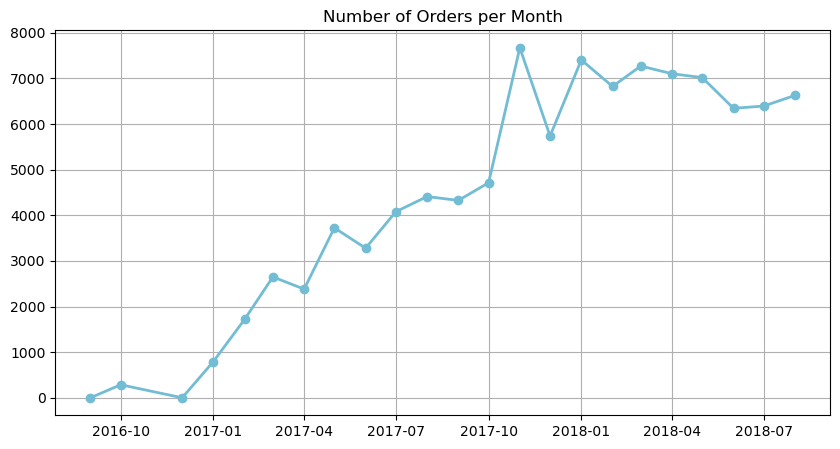

In [112]:
# Mengubah dataframe menjadi tipe data timestamp dan index lama diubah menjadi nama kolom baru
monthly_transactions_df = monthly_transaction.to_timestamp().reset_index(name='transaction_count')

# Melakukan visualisasi data
plt.figure(figsize=(10,5))
plt.plot(
    monthly_transactions_df['year_month_purchased'],
    monthly_transactions_df['transaction_count'],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month")
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.grid()
plt.show()

In [113]:
# Mendapatkan total pemasukan setiap bulan
monthly_revenue = all_df.groupby('year_month_purchased')['total_value'].sum()
monthly_revenue

year_month_purchased
2016-09        143.46
2016-10      49252.16
2016-12         19.62
2017-01     133075.86
2017-02     279630.86
2017-03     427429.70
2017-04     399828.02
2017-05     586720.28
2017-06     511850.80
2017-07     592229.46
2017-08     671112.02
2017-09     723930.73
2017-10     786327.89
2017-11    1211493.33
2017-12     868861.28
2018-01    1123608.54
2018-02    1001579.63
2018-03    1154793.01
2018-04    1177091.61
2018-05    1168478.77
2018-06    1044338.36
2018-07    1060388.00
2018-08    1030220.45
Freq: M, Name: total_value, dtype: float64

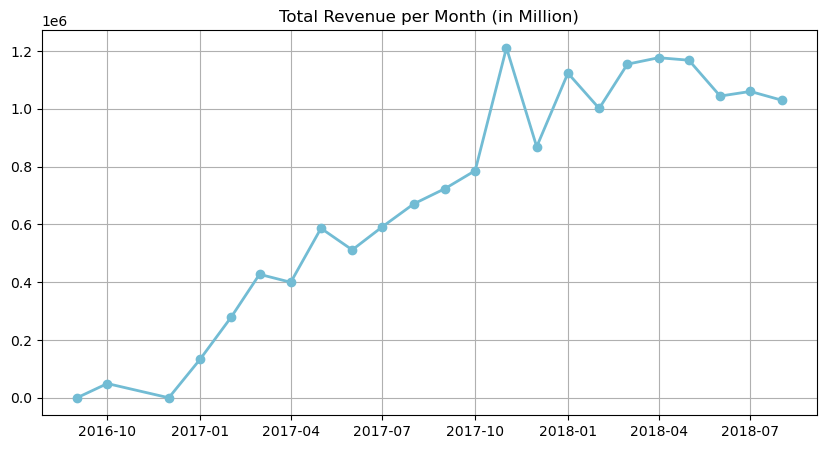

In [114]:
# Mengubah dataframe menjadi tipe data timestamp dan index lama diubah menjadi nama kolom baru
monthly_revenue = monthly_revenue.to_timestamp().reset_index(name='total_value')

plt.figure(figsize=(10,5))
plt.plot(
    monthly_revenue['year_month_purchased'],
    monthly_revenue['total_value'],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (in Million)")
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.grid()
plt.show()

Berdasarkan visualisasi data jumlah transaksi dan total pemasukan yang terjadi setiap bulan dapat ditemukan trend bahwa peningkatan jumlah transaksi cenderung berbanding lurus dengan total pemasukan yang diterima setiap bulan.

Tentu terdapat beberapa pengecualian seperti yang terjadi pada September 2017 dan April 2018, ditemukan bahwa jumlah transaksinya menurun jika dibandingkan bulan sebelumnya akan tetapi total pemasukan yang didapatkan meningkat. Hal sebaliknya juga terjadi pada Agustus 2018 yang memiliki jumlah transaksi yang lebih tinggi dari bulan sebelumnya tetapi memiliki total pemasukan yang lebih tinggi dibandingkan bulan sebelumnya.

Selain itu, dapat dilihat bahwa pada Desember 2017 terjadi penurunan kinerja penjualan karena jumlah transaksi dan total pemasukan mengalami penurunan yang cukup tajam jika dibandingkan dengan bulan-bulan lainnya.

### Kategori produk apa yang memiliki penjualan tertinggi dan terendah?

In [115]:
# Mendapatkan kategori produk dengan jumlah pemesanan tertinggi
highest_category = all_df['product_category_name'].value_counts().head().reset_index(name='order_count')
highest_category

product_category_name  order_count
0         bed_bath_table        10143
1          health_beauty         8885
2         sports_leisure         7721
3  computers_accessories         6777
4        furniture_decor         6697

In [116]:
# Mendapatkan kategori produk dengan jumlah pemesasanan terendah
lowest_category = all_df['product_category_name'].value_counts().tail().reset_index(name='order_count')
lowest_category

product_category_name  order_count
0  portateis_cozinha_e_preparadores_de_alimentos           13
1                              cds_dvds_musicals           12
2                                       pc_gamer            7
3                      fashion_childrens_clothes            7
4                          security_and_services            2

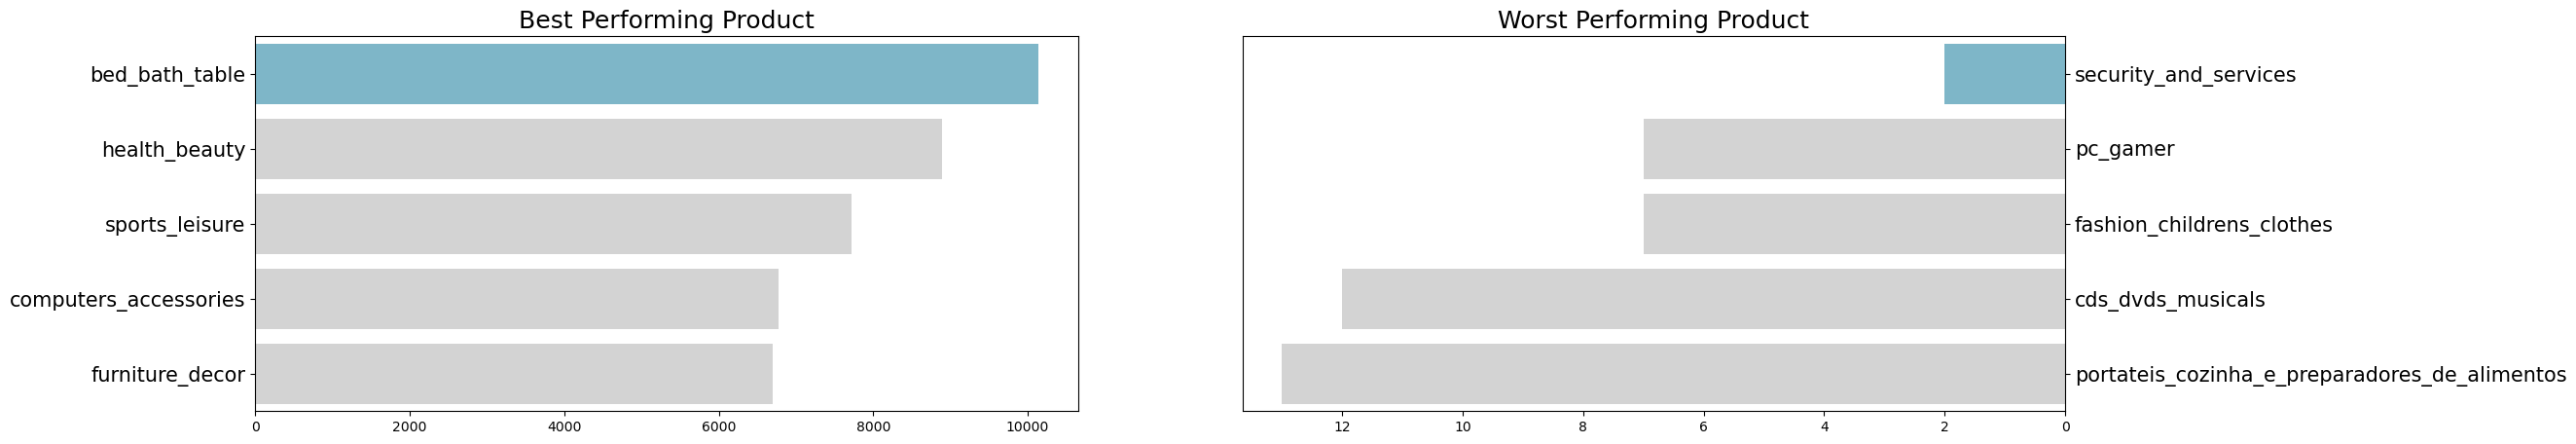

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_count", y="product_category_name", data=highest_category, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="order_count", y="product_category_name", data=lowest_category.sort_values(by='order_count'), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis ='y', labelsize=15)

Berdasarkan visualisasi di atas, 5 kategori dengan jumlah pemesanan tertinggi dipegang oleh 
- **bed_bath_table** : Produk yang mencakup seputar peralatan kasur, mandi, dan meja 
- **health_beautiy** : Produk yang mencakup seputar kesehatan dan kecantikan
- **sport_leisure** : Produk yang mencakup seputar peralatan olahraga
- **computers_accessories** : Produk yang mencakup seputar aksesoris komputer
- **furniture_decor** : Produk yang mencakup seputar dekorasi furnitur

Berdasarkan visualisasi di atas, 5 kategori dengan jumlah pemesanan terendah dipegang oleh 
- **security_and_services** : Produk yang mencakup seputar jasa dan keamanan
- **pc_gamer** : Produk yang mencakup seputar komputer gaming
- **fashion_childrens_clothes** : Produk yang mencakup seputar baju anak-anak
- **cds_dvds_musicals** : Produk yang mencakup seputar CD dan DVD musik
- **portateis_cozinha_e_preparadores_de_alimentos** : Produk yang mencakup seputar pembuat makanan dapur portabel

### Bagaimana kinerja pengantaran barang?

In [118]:
# Mendapatkan kinerja pengantaran dan mengubah index lama menjadi kolom baru
delivery_performance = orders_df['delivery_status'].value_counts().reset_index(name='delivery_count')
delivery_performance

delivery_status  delivery_count
0         On Time           89941
1            Late            6535

Text(0, 0.5, '')

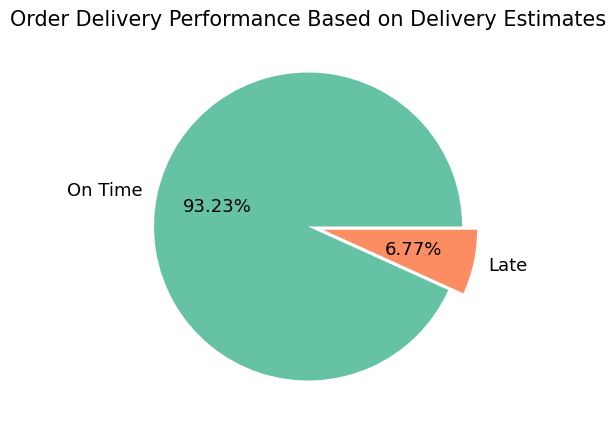

In [119]:
plt.figure(figsize=(10, 5))

plt.pie(
    delivery_performance['delivery_count'], 
    labels=delivery_performance['delivery_status'],
    # show percentage with two decimal points
    autopct='%1.2f%%',
    colors=sns.color_palette('Set2'),
    # increase the size of all text elements
    textprops={'fontsize':13},
    explode=[0, 0.1]
)
plt.title("Order Delivery Performance Based on Delivery Estimates", loc="center", fontsize=15)
plt.ylabel(None)

Berdasarkan visualisasi di atas, bahwa sebanyak 93.23% tanggal barang sampai ke tangan pelanggan, sebelum atau sama dengan tanggal perkiraan yang diberikan oleh sistem

Akan tetapi, masih terdapat sekitar 6.77% barang sampai ke tangan pelanggan melewati tanggal perkiraan barang sampai yang diberikan oleh sistem.

### Kota mana yang memiliki jumlah pelanggan terbanyak dan daya beli terbesar?

In [120]:
# Mendapatkan jumlah customer setiap kota dan mengubah index lama menjadi kolom baru
customer_count_by_city = all_df['customer_city'].value_counts().reset_index(name='customer_count')
customer_count_by_city.head(10)

customer_city  customer_count
0              sao paulo           15823
1         rio de janeiro            6872
2         belo horizonte            2827
3               brasilia            2176
4               curitiba            1541
5               campinas            1471
6           porto alegre            1411
7               salvador            1250
8              guarulhos            1185
9  sao bernardo do campo             945

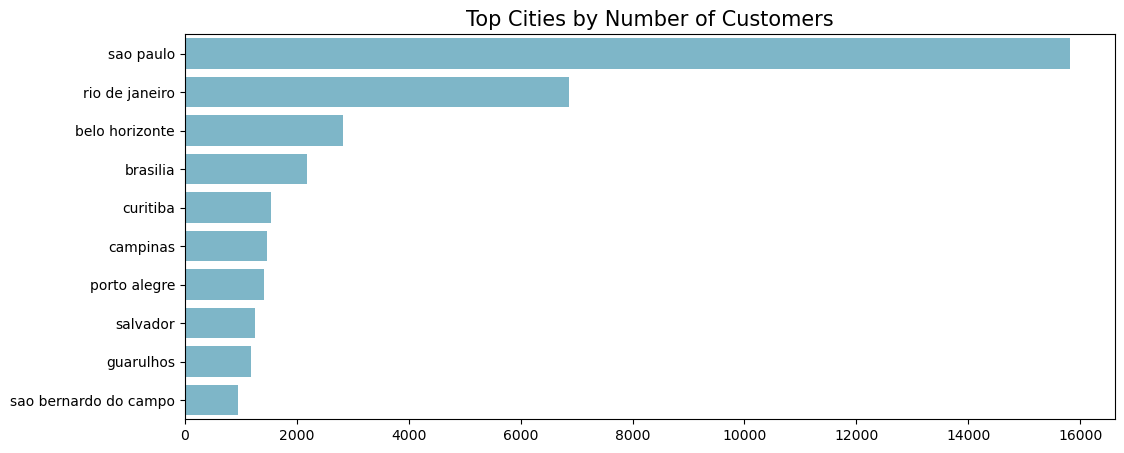

In [121]:
plt.figure(figsize=(12, 5))

sns.barplot(
    y="customer_city", 
    x="customer_count",
    data=customer_count_by_city.head(10),
    color='#72BCD4'
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Top Cities by Number of Customers", loc="center", fontsize=15)
plt.show()

In [122]:
# Mengelompokkan data berdasarkan 'customer_city'
total_spending_by_city = all_df.groupby('customer_city').agg(
    total_spending = ('total_value', 'sum'), # Mengambil total harga dengan menjumlahkan seluruh total_value
    customer_count = ('customer_id', 'nunique') # Mengambil jumlah customer
).sort_values(by='total_spending', ascending=False).reset_index()
total_spending_by_city.head(10)

customer_city  total_spending  customer_count
0       sao paulo      2210135.18           15046
1  rio de janeiro      1147262.93            6604
2  belo horizonte       418373.00            2697
3        brasilia       361983.47            2071
4        curitiba       244632.64            1489
5    porto alegre       222969.25            1341
6        campinas       217473.61            1406
7        salvador       214765.30            1188
8       guarulhos       162482.28            1143
9         niteroi       142809.26             825

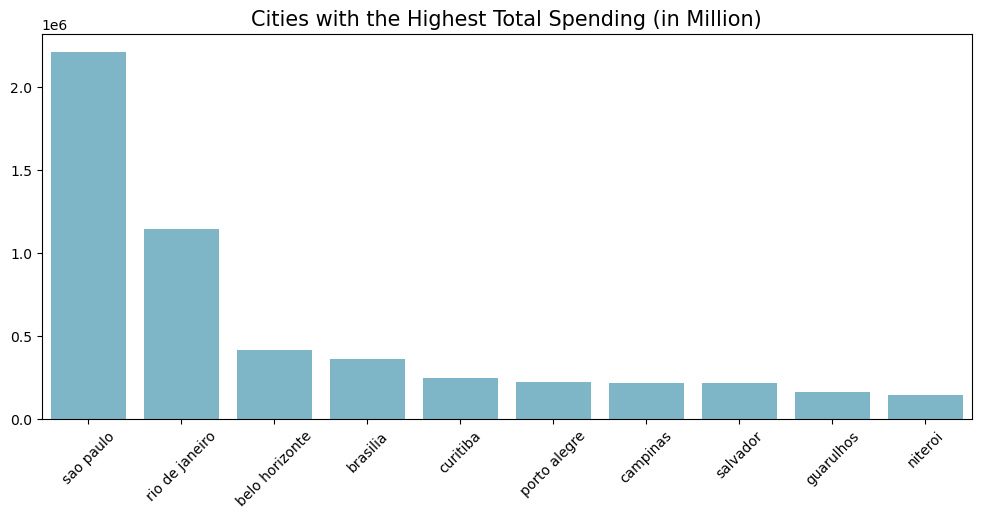

In [123]:
plt.figure(figsize=(12, 5))

sns.barplot(
    y="total_spending", 
    x="customer_city",
    data=total_spending_by_city.head(10),
    color='#72BCD4'
)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Cities with the Highest Total Spending (in Million)", loc="center", fontsize=15)
plt.show()

Berdasarkan visualisasi pertama, **Sao Paulo** memiliki jumlah pelanggan terbanyak dengan jumlah pelanggan sebanyak 15823 pelanggan dan diikuti oleh **rio de janeiro** dengan jumlah pelanggan sebanyak 6872 pelanggan, **belo horizonta** (2827 pelanggan), **brasilia** (2176 pelanggan), **curitiba** (1541 pelanggan), **campinas** (1471 pelanggan), **porto alegre** (1411 pelanggan), **salvador** (1250 pelanggan), **guarulhos** (1185 pelanggan), dan **sao bernardo do campo** (945 pelanggan)

Melihat visualisasi kedua, Top 5 kota dengan pengeluaran terbanyak sama dengan Top 5 kota dengan jumlah pelanggan terbanyak. **Sao Paulo** memiliki total pengeluaran terbesar dengan total pengeluaran  sebanyak 2210135.18, diikuti oleh **rio de janeiro** dengan total pengeluaran 1147262.93, **belo horizonta** dengan total pengeluaran 418373.00, **brasilia** dengan total pengeluaran 361983.47, **curitiba** dengan total pengeluaran 244632.64.

Untuk urutan ke-6 sampai 10 diduduki oleh kota **porto alegre** dengan total pengeluaran 222969.25, **campinas** dengan total pengeluaran 217473.61, **salvador** dengan total pengeluaran 214765.30, **guarulhos** dengan total pengeluaran 162482.28, dan **niteroi** dengan total pengeluaran 142809.26.

## Analisis Lanjutan

### Menghitung Average Spending Customer Setiap Kota berdasarkan Kepadatan Jumlah Customer

In [124]:
# Mengelompokkan data berdasarkan 'customer_city'
average_spending_by_city = all_df.groupby('customer_city').agg(
    average_spending = ('total_value', 'mean'), # Mengambil average spending dengan rata-rata dari total_value
    customer_count = ('customer_id', 'nunique'), # Mengambil jumlah customer
).sort_values(by='average_spending', ascending=False).reset_index()
average_spending_by_city.sample(5)

customer_city  average_spending  customer_count
3282                  mato rico         92.650000               1
2729             frutuoso gomes        115.870000               1
1205  caldeirao grande do piaui        180.760000               1
3544                     galvao         78.020000               1
2005                   camacari        143.752656              60

Pengelompokkan akan menggunakan metode **Tertile** untuk mengkategorikan kota menjadi tiga kategori berdasarkan kepadatan jumlah customer yang berada di kota tersebut

In [125]:
# Mendapatkan kota yang memiliki lebih dari satu customer
average_spending_by_city = average_spending_by_city[average_spending_by_city['customer_count'] > 1]

# Menghitung tertile dan memberikan kategori kota berdasarkan kepadatan pelanggannya
average_spending_by_city['customer_density'] = pd.qcut(average_spending_by_city['customer_count'], q=3, labels=['Low', 'Medium', 'High'])
average_spending_by_city['customer_density'].value_counts()

customer_density
Low       1086
High       939
Medium     922
Name: count, dtype: int64

In [126]:
# Mendapatkan 5 sampel acak
average_spending_by_city.sample(5)

customer_city  average_spending  customer_count customer_density
2491              iacu        124.962500               4           Medium
3640           sarzedo         72.312105              18             High
2781        cavalcante        114.035000               2              Low
63           venturosa        648.530000               2              Low
949   primeiro de maio        201.087143               7           Medium

In [127]:
# Mendapatkan 3 kota dengan rata-rata pengeluaran tertinggi sesuai dengan kategori kepadatan pelanggannya
top_cities = average_spending_by_city.groupby('customer_density').apply(lambda x: x.nlargest(3, 'average_spending')).reset_index(drop=True)
top_cities

customer_city  average_spending  customer_count customer_density
0            paranatinga       1287.160000               2              Low
1                   sape       1021.415000               2              Low
2             crissiumal        835.650000               2              Low
3     bom jesus do galho       1230.952500               4           Medium
4               pacatuba        893.972000               5           Medium
5        trindade do sul        843.182500               4           Medium
6  campo novo do parecis        510.139375              15             High
7          campo formoso        449.855000              10             High
8                 gaspar        400.101724              29             High

Text(0.5, 0.98, 'Cities with the Highest Average Spending Based on Customer Density')

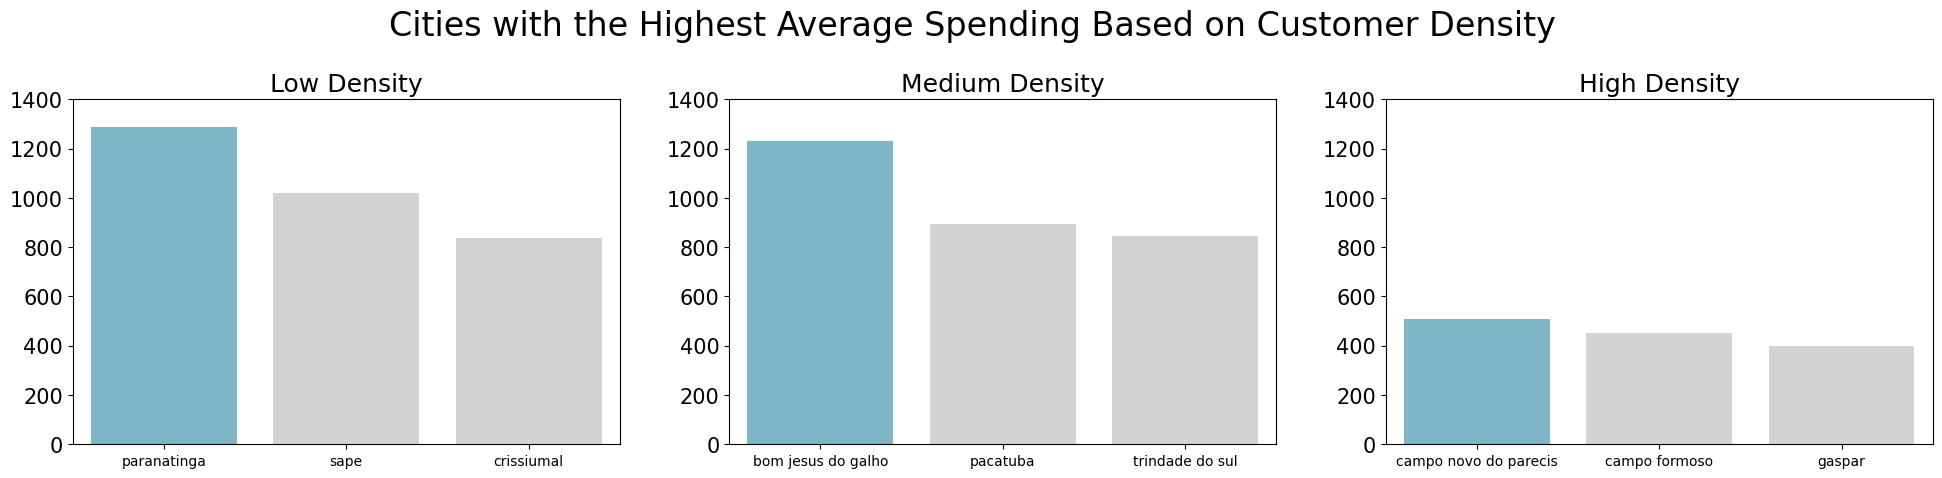

In [128]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_city", y="average_spending", data=top_cities[top_cities['customer_density'] == 'Low'], palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_ylim(0, 1400)
ax[0].set_title("Low Density", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="customer_city", y="average_spending", data=top_cities[top_cities['customer_density'] == 'Medium'], palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_ylim(0, 1400)
ax[1].set_title("Medium Density", loc="center", fontsize=18)
ax[1].tick_params(axis ='y', labelsize=15)

sns.barplot(x="customer_city", y="average_spending", data=top_cities[top_cities['customer_density'] == 'High'], palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_ylim(0, 1400)
ax[2].set_title("High Density", loc="center", fontsize=18)
ax[2].tick_params(axis ='y', labelsize=15)

fig.subplots_adjust(top=0.80)
fig.suptitle('Cities with the Highest Average Spending Based on Customer Density', fontsize=24)

### Peta Persebaran Customer

In [129]:
# Menggabungkan dua dataframe
customer_geo_df = pd.merge(
    left=all_df,
    right=geolocation_df,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)
customer_geo_df.head()

review_id                          order_id  \
0  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
1  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
2  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
3  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
4  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   

   review_score review_comment_title  \
0           4.0                 None   
1           4.0                 None   
2           4.0                 None   
3           4.0                 None   
4           4.0                 None   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
2  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
3  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
4  Não testei o produto ainda, mas ele veio corre...           2017-10-11   

  review_answer_timestamp                        product_id  \
0     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   
1     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   
2     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   
3     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   
4     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   

                          seller_id shipping_limit_date  ...  \
0  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   
1  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   
2  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   
3  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   
4  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   

   order_delivered_carrier_date  order_delivered_customer_date  \
0           2017-10-04 19:55:00                     2017-10-10   
1           2017-10-04 19:55:00                     2017-10-10   
2           2017-10-04 19:55:00                     2017-10-10   
3           2017-10-04 19:55:00                     2017-10-10   
4           2017-10-04 19:55:00                     2017-10-10   

   order_estimated_delivery_date  delivery_status year_month_purchased  \
0                     2017-10-18          On Time              2017-10   
1                     2017-10-18          On Time              2017-10   
2                     2017-10-18          On Time              2017-10   
3                     2017-10-18          On Time              2017-10   
4                     2017-10-18          On Time              2017-10   

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       3149.0       -23.574809       -46.587471   
1                       3149.0       -23.578333       -46.587123   
2                       3149.0       -23.575033       -46.587451   
3                       3149.0       -23.580054       -46.586673   
4                       3149.0       -23.576281       -46.587276   

   geolocation_city  geolocation_state  
0         sao paulo                 SP  
1         sao paulo                 SP  
2         sao paulo                 SP  
3         sao paulo                 SP  
4         sao paulo                 SP  

[5 rows x 43 columns]

In [130]:
customer_geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10491179 entries, 0 to 10491178
Data columns (total 43 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   review_id                      object        
 1   order_id                       object        
 2   review_score                   float64       
 3   review_comment_title           object        
 4   review_comment_message         object        
 5   review_creation_date           datetime64[ns]
 6   review_answer_timestamp        datetime64[ns]
 7   product_id                     object        
 8   seller_id                      object        
 9   shipping_limit_date            datetime64[ns]
 10  quantity                       int64         
 11  price                          float64       
 12  freight_value                  float64       
 13  total_value                    float64       
 14  product_category_name          object        
 15  product_name_

In [131]:
# Mengelompokkan data berdasarkan 'customer_zip_code_prefix'
customer_count_by_zip = customer_geo_df.groupby(['customer_id', 'customer_zip_code_prefix']).agg(
    geolocation_lat = ('geolocation_lat', 'first'), # Mengambil latitude dari data yang zip code serupa
    geolocation_lng = ('geolocation_lng', 'first'), # Mengambil longitude dari data yang zip code serupa
    customer_count = ('customer_id', 'count') # Menghitung jumlah customer
).reset_index()
customer_count_by_zip.head()

customer_id  customer_zip_code_prefix  \
0  00012a2ce6f8dcda20d059ce98491703                      6273   
1  000161a058600d5901f007fab4c27140                     35550   
2  0001fd6190edaaf884bcaf3d49edf079                     29830   
3  0002414f95344307404f0ace7a26f1d5                     39664   
4  000379cdec625522490c315e70c7a9fb                      4841   

   geolocation_lat  geolocation_lng  customer_count  
0       -23.499689       -46.766901              75  
1       -20.470582       -45.108716              87  
2       -18.716793       -40.397969             173  
3       -21.770599       -43.355230               1  
4       -23.741140       -46.690509              72

In [132]:
# Mendapatkan jumlah missing value setiap kolom
customer_count_by_zip.isna().sum()

customer_id                   0
customer_zip_code_prefix      0
geolocation_lat             264
geolocation_lng             264
customer_count                0
dtype: int64

In [133]:
# Menghapus data yang memiliki missing value
customer_count_by_zip.dropna(inplace=True)

In [134]:
# Menjadikan Brazil sebagai peta pusat
m = folium.Map(location=[-25.2350, -51.9253], zoom_start=4)

# Menambahkan data heatmap berdasarkan lokasi dan jumlah customer
heat_data = [[row['geolocation_lat'], row['geolocation_lng'], row['customer_count']] for index, row in customer_count_by_zip.iterrows()]
HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)

# Menampilkan peta
m.save("customer_density_heatmap.html")
m

### Peta Persebaran Seller

In [135]:
# Menggabungkan dua dataframe
seller_geo_df = pd.merge(
    left=all_df,
    right=geolocation_df,
    how='left',
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)
seller_geo_df.head()

review_id                          order_id  \
0  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
1  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
2  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
3  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
4  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   

   review_score review_comment_title  \
0           4.0                 None   
1           4.0                 None   
2           4.0                 None   
3           4.0                 None   
4           4.0                 None   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
2  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
3  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
4  Não testei o produto ainda, mas ele veio corre...           2017-10-11   

  review_answer_timestamp                        product_id  \
0     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   
1     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   
2     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   
3     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   
4     2017-10-12 03:43:48  87285b34884572647811a353c7ac498a   

                          seller_id shipping_limit_date  ...  \
0  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   
1  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   
2  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   
3  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   
4  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  ...   

   order_delivered_carrier_date  order_delivered_customer_date  \
0           2017-10-04 19:55:00                     2017-10-10   
1           2017-10-04 19:55:00                     2017-10-10   
2           2017-10-04 19:55:00                     2017-10-10   
3           2017-10-04 19:55:00                     2017-10-10   
4           2017-10-04 19:55:00                     2017-10-10   

   order_estimated_delivery_date  delivery_status year_month_purchased  \
0                     2017-10-18          On Time              2017-10   
1                     2017-10-18          On Time              2017-10   
2                     2017-10-18          On Time              2017-10   
3                     2017-10-18          On Time              2017-10   
4                     2017-10-18          On Time              2017-10   

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       9350.0       -23.680114       -46.452454   
1                       9350.0       -23.675223       -46.441038   
2                       9350.0       -23.685712       -46.444796   
3                       9350.0       -23.679951       -46.448247   
4                       9350.0       -23.678662       -46.442578   

   geolocation_city  geolocation_state  
0              maua                 SP  
1              maua                 SP  
2              mauá                 SP  
3              maua                 SP  
4              maua                 SP  

[5 rows x 43 columns]

In [136]:
# Mengelompokkan data berdasarkan 'seller_zip_code_prefix'
seller_count_by_zip = seller_geo_df.groupby(['seller_id', 'seller_zip_code_prefix']).agg(
    geolocation_lat = ('geolocation_lat', 'first'), # Mengambil latitude dari data yang zip code serupa
    geolocation_lng = ('geolocation_lng', 'first'), # Mengambil longitude dari data yang zip code serupa
    seller_count = ('seller_id', 'count') # Menghitung jumlah customer
).reset_index()
seller_count_by_zip.head()

seller_id  seller_zip_code_prefix  geolocation_lat  \
0  0015a82c2db000af6aaaf3ae2ecb0532                    9080       -23.644439   
1  001cca7ae9ae17fb1caed9dfb1094831                   29156       -20.297537   
2  002100f778ceb8431b7a1020ff7ab48f                   14405       -20.506794   
3  003554e2dce176b5555353e4f3555ac8                   74565       -16.648412   
4  004c9cd9d87a3c30c522c48c4fc07416                   14940       -21.766477   

   geolocation_lng  seller_count  
0       -46.539885           480  
1       -40.400869          8428  
2       -47.407738         13145  
3       -49.311191            38  
4       -48.831547         40755

In [137]:
# Mendapatkan jumlah missing value setiap kolom
seller_count_by_zip.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
geolocation_lat           7
geolocation_lng           7
seller_count              0
dtype: int64

In [138]:
# Menghapus data yang memiliki missing value
seller_count_by_zip.dropna(inplace=True)

In [139]:
# Menjadikan Brazil sebagai peta pusat
m = folium.Map(location=[-25.2350, -51.9253], zoom_start=4)

# Menambahkan data heatmap berdasarkan lokasi dan jumlah customer
heat_data = [[row['geolocation_lat'], row['geolocation_lng'], row['seller_count']] for index, row in seller_count_by_zip.iterrows()]
HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)

# Menampilkan peta
m.save("seller_density_heatmap.html")
m

In [ ]:
all_df.to_csv('all_data.csv', index=False)
customer_geo_df.to_csv('customer_geo_df.csv', index=False)
seller_geo_df.to_csv('seller_geo_df.csv', index=False)

## Conclusion

**Berapa jumlah transaksi yang terjadi setiap bulan pada platfrom e-commerce?**

Jumlah transaksi dimulai dari Oktober 2016 dengan total 1 transaksi. Jumlah transaksi terus meningkat seiring berjalannya waktu dengan puncaknya terjadi pada November 2017 dengan jumlah transaksi sebanyak 7672 transaksi yang terjadi. Setelah itu, jumlah transaksi mengalami penurunan dan kenaikan secara bergantian. Berdasarkan data terakhir, jumlah transaksi yang terjadi pada Agustus 2018 sebanyak 6629. 

Grafik total pemasukan memiliki pola yang mirip dengan grafik jumlah transaksi yang terjadi. Pada Oktober 2016, total pemasukan yang diterima sebesar 143,46 dan pemasukan terbesarnya terjadi pada November 2017 dengan total pemasukan sebesar 1211493,33. Berdasarkan data terakhir, total pemasukan yang diterima pada Agustus 2018 sebesar 1030220,45.

**Kategori produk apa yang memiliki penjualan tertinggi dan terendah?**

Terdapat 74 kategori produk yang tersedia pada e-commerce. Kategori produk yang memiliki jumlah barang yang terjual paling banyak adalah **bed_bath_table** dengan jumlah produk terjual sebanyak 10143 diikuti dengan **health_beauty** (8885 produk terjual), **sport_leisure** (7721 produk terjual), **computers_accessories** (6777 produk terjual), dan **furniture_decor** (6697 produk terjual).

Adapun kategori produk yang memiliki jumlah penjualan terendah adalah **security_and_services** dengan jumlah produk terjual sebanyak 2, diikuti dengan **pc_gamer** (7 produk terjual), **fashion_childrens_clothes** (7 produk terjual), **cds_dvds_musicals** (12 produk terjual), dan **portateis_cozinha_e_preparadores_de_alimentos** (13 produk terjual).

**Bagaimana kinerja pengantaran barang?**

Kinerja pengantaran barang memiliki performa yang baik. Hal ini ditandai dengan sebanyak 93.23% tanggal barang sampai ke tangan pelanggan, sebelum atau sama dengan tanggal perkiraan yang diberikan oleh sistem

Akan tetapi, masih terdapat sekitar 6.77% barang sampai ke tangan pelanggan melewati tanggal perkiraan barang sampai yang diberikan oleh sistem.

**Kota mana yang memiliki jumlah pelanggan terbanyak dan daya beli terbesar?**

Berdasarkan visualisasi pertama, **Sao Paulo** memiliki jumlah pelanggan terbanyak dengan jumlah pelanggan sebanyak 15823 pelanggan dan diikuti oleh **rio de janeiro** dengan jumlah pelanggan sebanyak 6872 pelanggan, **belo horizonta** (2827 pelanggan), **brasilia** (2176 pelanggan), **curitiba** (1541 pelanggan), **campinas** (1471 pelanggan), **porto alegre** (1411 pelanggan), **salvador** (1250 pelanggan), **guarulhos** (1185 pelanggan), dan **sao bernardo do campo** (945 pelanggan)

Melihat visualisasi kedua, Top 5 kota dengan pengeluaran terbanyak sama dengan Top 5 kota dengan jumlah pelanggan terbanyak. **Sao Paulo** memiliki total pengeluaran terbesar dengan total pengeluaran  sebanyak 2210135.18, diikuti oleh **rio de janeiro** dengan total pengeluaran 1147262.93, **belo horizonta** dengan total pengeluaran 418373.00, **brasilia** dengan total pengeluaran 361983.47, **curitiba** dengan total pengeluaran 244632.64.

Untuk urutan ke-6 sampai 10 diduduki oleh kota **porto alegre** dengan total pengeluaran 222969.25, **campinas** dengan total pengeluaran 217473.61, **salvador** dengan total pengeluaran 214765.30, **guarulhos** dengan total pengeluaran 162482.28, dan **niteroi** dengan total pengeluaran 142809.26.